# Computer vision problem

###### These reload statements are for reload libraries used if changed 

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

###### Importing fastai libraries

In [2]:
import torchvision

In [3]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.io import *

###### Path defining for dataset

In [4]:
path='data/Vision_task_dataset_public/'

In [6]:
cd data/Vision_task_dataset_public/

C:\Users\lenovo\fastai\courses\ml1\data\Vision_task_dataset_public


###### Function for loading pickle files for train-test-labels_data

In [7]:
def load_data(filen):
    file = open(filen, 'rb')
    data = pickle.load(file)
    file.close()
    return np.array(data)

In [8]:
filename='train_image.pkl'
x=load_data(filename)

In [9]:
filename='train_label.pkl'
y=load_data(filename)

In [10]:
filename='test_image.pkl'
a=load_data(filename)

In [11]:
type(x),x.shape,type(y),y.shape

(numpy.ndarray, (8000, 784), numpy.ndarray, (8000,))

###### Normalization of given train_data and test_data

In [12]:
mean=x.mean()
std=x.std()
x=(x-mean)/std
mean,std,x.mean(),x.std()

(82.34471715561224,
 90.13524982294025,
 1.2235110883624174e-18,
 1.0000000000000002)

In [13]:
mean=a.mean()
std=a.std()
a=(a-mean)/std
mean,std,a.mean(),a.std()

(82.52279655612244, 90.00013142400093, 2.095376026884377e-17, 1.0)

###### Dividing the dataset into train and validation data for labels also to determine the accuracy of the model

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.20, random_state=42)

######  Function for plotting the given data for pre-processing and understanding the data

In [15]:
def show(img,title=None):
    plt.imshow(img,cmap='gray')
    if title is not None:plt.title(title)

In [16]:
def plots(ims,figsize=(12,6),rows=2,titles=None):
    f=plt.figure(figsize=figsize)
    cols=len(ims)//rows
    for i in range(len(ims)):
        sp=f.add_subplot(rows,cols,i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i],fontsize=16)
        plt.imshow(ims[i],cmap='gray')

In [17]:
x_valid.shape

(1600, 784)

In [18]:
x_imgs=np.reshape(x_valid,(-1,28,28));x_imgs.shape

(1600, 28, 28)

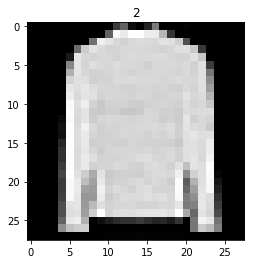

In [19]:
show(x_imgs[0],y_valid[0])

In [20]:
x_imgs[0,10:15,10:15]

array([[1.41626, 1.40517, 1.41626, 1.36079, 1.36079],
       [1.38298, 1.38298, 1.30532, 1.28313, 1.32751],
       [1.47174, 1.47174, 1.46064, 1.43845, 1.46064],
       [1.44955, 1.43845, 1.46064, 1.46064, 1.49392],
       [1.41626, 1.44955, 1.47174, 1.46064, 1.44955]])

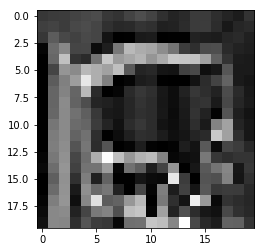

In [21]:
show(x_imgs[1,5:25,5:25])

### Import more fastai libraries for using pytorch and use cuda-GPU for faster computation

In [22]:
from fastai.metrics import *
from fastai.model import *
from fastai.dataset import *

import torch.nn as nn

##### defining the neural net with linear and non-linear functions respectively

In [23]:
net=nn.Sequential(
    nn.Linear(28*28,100),
    nn.ReLU(),
    nn.Linear(100,100),
    nn.ReLU(),
    nn.Linear(100,10),
    nn.LogSoftmax()
).cuda()

#### Defining a classifier model object to wrap data for prediction and calculation of accuracy 
(loss - cross entropy or Negative log likelihood loss)

In [24]:
md=ImageClassifierData.from_arrays(path,(x_train,y_train),(x_valid,y_valid),test=a)

In [25]:
loss=nn.NLLLoss()
metrics=[accuracy]
opt=optim.SGD(net.parameters(),1e-1,momentum=0.9,weight_decay=1e-3)

###### defining function for binary loss and fitting the model with neural net 

In [26]:
def binar_loss(y,p):
    return np.mean(-(y*np.log(p)+(1-y)*np.log(1-p)))

In [32]:
fit(net,md,n_epochs=5,crit=loss,opt=opt,metrics=metrics)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.316427   0.470756   0.8225    
    1      0.309868   0.49211    0.811875                                                                              
    2      0.303916   0.473058   0.8225                                                                                
    3      0.297077   0.48225    0.81625                                                                               
    4      0.296504   0.494019   0.815625                                                                              



[0.49401924848556517, 0.815625]

In [29]:
set_lrs(opt,1e-2) #learning rate scheduler

In [33]:
fit(net,md,n_epochs=5,crit=loss,opt=opt,metrics=metrics)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.291629   0.490557   0.814375  
    1      0.275457   0.52021    0.805                                                                                 
    2      0.278542   0.477443   0.82                                                                                  
    3      0.27097    0.493976   0.8225                                                                                
    4      0.253598   0.502008   0.82                                                                                  



[0.5020078784227371, 0.82]

In [34]:
preds=predict(net,md.val_dl)

### Now, for predicting values for test set and exporting

In [35]:
preds_test=predict(net,md.test_dl)

In [36]:
preds_test=preds_test.argmax(1)

In [37]:
a.shape

(2000, 784)

In [44]:
df3=pd.DataFrame({'predicted class' : preds_test})
df3.to_csv('Mohit_asudani.csv')

### For comparision of predicted label and validation label. 
Also, for plotting to see reason for accuracy metric

In [39]:
preds.argmax(axis=1)[:5]

array([2, 6, 0, 2, 3], dtype=int64)

In [40]:
preds=preds.argmax(1)

In [41]:
np.mean(preds==y_valid)

0.82

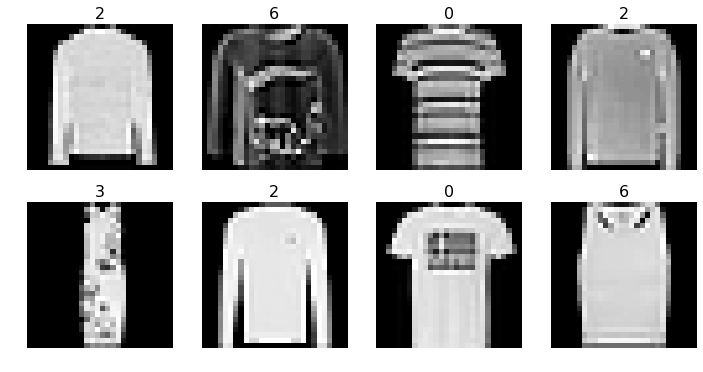

In [42]:
plots(x_imgs[:8],titles=preds[:8])